In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
df = pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]
print(X)
y

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 24)

In [42]:
lr = LogisticRegression()

In [43]:
# Fits the model to the training data using classifier.fit

classifier = LogisticRegression(solver = "liblinear")
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [44]:
y_test_prediction = classifier.predict(X_test)
y_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
print(accuracy_score(y_test,y_test_prediction))


0.7291666666666666


In [46]:
y_train_prediction = classifier.predict(X_train)
print(accuracy_score(y_test, y_test_prediction))

0.7291666666666666


In [47]:
con_mat = confusion_matrix(y_test,y_test_prediction)
con_mat

array([[112,  12],
       [ 40,  28]], dtype=int64)

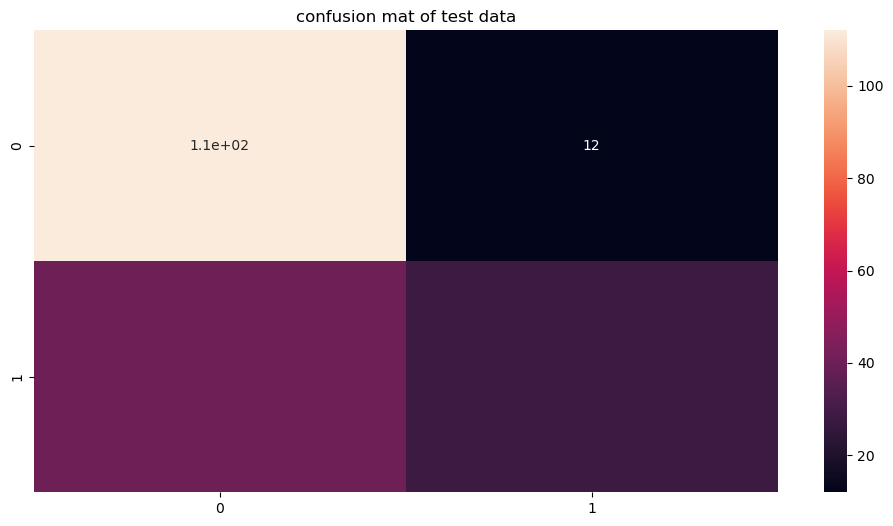

In [59]:
# plt heatmap

fig = plt.figure(figsize = (12,6))
sns.heatmap(con_mat,annot = True)
plt.title("confusion mat of test data")
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_prediction))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       124
           1       0.70      0.41      0.52        68

    accuracy                           0.73       192
   macro avg       0.72      0.66      0.67       192
weighted avg       0.72      0.73      0.71       192



In [64]:
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
print(TN)
print(TP)
print(FN)
print(FP)

112
28
40
12


In [65]:
recall = TP /(TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)